In [339]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df = pd.read_excel("feature_engineering.xlsx")
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,Single_Parent,Recency_Class,Age_Class,Total_Spent,Total_Spent_Class,Total_Purchases,Total_Purchases_Class,Total_Visits,Total_Visits_Class,Average_Purchase
0,1826,Graduation,Divorced,84835,0,0,0,189,104,379,...,False,Very Recent,Retiree,1190,Average-Spender,15,15-19,1,0-19,602.5
1,1,Graduation,Single,57091,0,0,0,464,5,64,...,False,Very Recent,Senior Citizen,577,Light-Spender,18,15-19,5,0-19,297.5
2,10476,Graduation,Married,67267,0,1,0,134,11,59,...,False,Very Recent,Senior Citizen,251,Cheap-Spender,11,10-14,2,0-19,131.0
3,1386,Graduation,Together,32474,1,1,0,10,0,1,...,False,Very Recent,Retiree,11,Cheap-Spender,4,0-4,7,0-19,7.5
4,5371,Graduation,Single,21474,1,0,0,6,16,24,...,True,Very Recent,Middle-Aged Working Class,91,Cheap-Spender,8,5-9,7,0-19,49.5


## Feature Engineering

In [340]:
features = df.drop(columns=['ID'])
features.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Single_Parent,Recency_Class,Age_Class,Total_Spent,Total_Spent_Class,Total_Purchases,Total_Purchases_Class,Total_Visits,Total_Visits_Class,Average_Purchase
0,Graduation,Divorced,84835,0,0,0,189,104,379,111,...,False,Very Recent,Retiree,1190,Average-Spender,15,15-19,1,0-19,602.5
1,Graduation,Single,57091,0,0,0,464,5,64,7,...,False,Very Recent,Senior Citizen,577,Light-Spender,18,15-19,5,0-19,297.5
2,Graduation,Married,67267,0,1,0,134,11,59,15,...,False,Very Recent,Senior Citizen,251,Cheap-Spender,11,10-14,2,0-19,131.0
3,Graduation,Together,32474,1,1,0,10,0,1,0,...,False,Very Recent,Retiree,11,Cheap-Spender,4,0-4,7,0-19,7.5
4,Graduation,Single,21474,1,0,0,6,16,24,11,...,True,Very Recent,Middle-Aged Working Class,91,Cheap-Spender,8,5-9,7,0-19,49.5


In [341]:
# Also encode Education and Marital_Status
features = pd.get_dummies(features, columns=['Education'], prefix='Education')
features = pd.get_dummies(features, columns=['Marital_Status'], prefix='Marital')
features = pd.get_dummies(features, columns=['Recency_Class'], prefix='Recency')
features = pd.get_dummies(features, columns=['Age_Class'], prefix='Age')
features = pd.get_dummies(features, columns=['Total_Spent_Class'], prefix='Total_Spent')
features = pd.get_dummies(features, columns=['Total_Purchases_Class'], prefix='Total_Purchases')
features = pd.get_dummies(features, columns=['Total_Visits_Class'], prefix='Total_Visits')
features = pd.get_dummies(features, columns=['Family_Classification'], prefix='Family_Classification')
features.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Total_Purchases_5-9,Total_Visits_0-19,Total_Visits_100-119+,Total_Visits_20-39,Total_Visits_40-59,Total_Visits_60-79,Total_Visits_80-99,Family_Classification_Childless,Family_Classification_Medium-Children,Family_Classification_Single-Child
0,84835,0,0,0,189,104,379,111,189,218,...,False,True,False,False,False,False,False,True,False,False
1,57091,0,0,0,464,5,64,7,0,37,...,False,True,False,False,False,False,False,True,False,False
2,67267,0,1,0,134,11,59,15,2,30,...,False,True,False,False,False,False,False,False,False,True
3,32474,1,1,0,10,0,1,0,0,0,...,False,True,False,False,False,False,False,False,True,False
4,21474,1,0,0,6,16,24,11,0,34,...,True,True,False,False,False,False,False,False,False,True


In [342]:
print(list(features.columns))


['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Response', 'Complain', 'Age', 'Customer_Enrollment', 'Household', 'Children', 'Single_Parent', 'Total_Spent', 'Total_Purchases', 'Total_Visits', 'Average_Purchase', 'Education_2n Cycle', 'Education_Basic', 'Education_Graduation', 'Education_Master', 'Education_PhD', 'Marital_Divorced', 'Marital_Married', 'Marital_Single', 'Marital_Together', 'Marital_Widow', 'Recency_Infrequent', 'Recency_Less Frequent', 'Recency_Moderate', 'Recency_Recent', 'Recency_Very Recent', 'Age_Middle-Aged Working Class', 'Age_Quinquagenarian', 'Age_Retiree', 'Age_Senior Citizen', 'Age_Very Old Senior Citizen', 'Total_Spent_Above-Average-Spender', 'Total_Spent_Average-Spender', 'Total_Spent_Cheap-Spender', 'Total_Spent_Heavy-Spender', 'Total_Spent_Light-Spender', 'T

In [343]:
features.reset_index(inplace=True)

## Logistic Regression

In [344]:
from sklearn.model_selection import train_test_split
X = features.drop(columns=['Response'], axis=1).iloc[:,1:][['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 
                                                            'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
                                                            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                                                            'NumStorePurchases', 'NumWebVisitsMonth', 
                                                            'Complain', 'Age', 'Customer_Enrollment', 'Household', 
                                                            'Children', 'Single_Parent', 'Total_Spent', 'Total_Purchases', 
                                                            'Total_Visits', 'Average_Purchase', 'Education_2n Cycle', 'Education_Basic', 
                                                            'Education_Graduation', 'Education_Master', 'Education_PhD', 
                                                            'Marital_Divorced', 'Marital_Married', 'Marital_Single', 'Marital_Together', 
                                                            'Marital_Widow', 'Recency_Infrequent', 'Recency_Less Frequent', 
                                                            'Recency_Moderate', 'Recency_Recent', 'Recency_Very Recent', 
                                                            'Age_Middle-Aged Working Class', 'Age_Quinquagenarian', 'Age_Retiree', 
                                                            'Age_Senior Citizen', 'Age_Very Old Senior Citizen', 
                                                            'Total_Spent_Above-Average-Spender', 'Total_Spent_Average-Spender', 
                                                            'Total_Spent_Cheap-Spender', 'Total_Spent_Heavy-Spender', 
                                                            'Total_Spent_Light-Spender', 'Total_Spent_Very-Heavy-Spender', 
                                                            'Total_Purchases_0-4', 'Total_Purchases_10-14', 'Total_Purchases_15-19', 
                                                            'Total_Purchases_20-24', 'Total_Purchases_25-29', 'Total_Purchases_30-34', 
                                                            'Total_Purchases_35-39+', 'Total_Purchases_5-9', 'Total_Visits_0-19', 
                                                            'Total_Visits_100-119+', 'Total_Visits_20-39', 'Total_Visits_40-59', 
                                                            'Total_Visits_60-79', 'Total_Visits_80-99', 'Family_Classification_Childless', 
                                                            'Family_Classification_Medium-Children', 'Family_Classification_Single-Child']
]
# X = features.drop(columns=['Response'], axis = 1)
y = features['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [345]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
# smote = SMOTE(random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)
# ros = RandomOverSampler(random_state=42)
# X_train, y_train = ros.fit_resample(X_train, y_train)

In [346]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [347]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

## Hyperparameter Optimization

In [348]:
from sklearn.model_selection import GridSearchCV
parameters = [{'penalty':['l1','l2']}, 
              {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}]
grid_search = GridSearchCV(estimator = lg,  
                           param_grid = parameters,
                           scoring = 'precision',
                           cv = 5,
                           verbose=0)
grid_search.fit(X_train_scaled, y_train)

c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
5 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'penalty': ['l1', 'l2']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}],
             scoring='precision')

In [349]:
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))
print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV best score : 0.7365


Parameters that give the best results : 

 {'C': 0.01}


Estimator that was chosen by the search : 

 LogisticRegression(C=0.01)
GridSearch CV score on test set: 0.1386


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [350]:
# Evaluation Metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
lg = grid_search.best_estimator_
lg.fit(X_train_scaled, y_train)
lg_pred_train = lg.predict(X_train_scaled)
lg_pred_test = lg.predict(X_test_scaled)
lg_acc = accuracy_score(y_test, lg_pred_test)
lg_prec = precision_score(y_test, lg_pred_test)
lg_rec = recall_score(y_test, lg_pred_test)
lg_f1 = f1_score(y_test, lg_pred_test)
lg_auc = roc_auc_score(y_test, lg_pred_test)
print("Logistic Regression Accuracy: %.4f" % lg_acc)
print("Logistic Regression Precision: %.4f" % lg_prec)
print("Logistic Regression Recall: %.4f" % lg_rec)
print("Logistic Regression F1: %.4f" % lg_f1)
print("Logistic Regression AUC: %.4f" % lg_auc)

lg_prec_train = precision_score(y_train, lg_pred_train)
lg_prec_test = precision_score(y_test, lg_pred_test)
# Check for overfitting
print('Training set score: {:.4f}'.format(lg_prec_train))
print('Test set score: {:.4f}'.format(lg_prec_test))

Logistic Regression Accuracy: 0.8804
Logistic Regression Precision: 0.7200
Logistic Regression Recall: 0.2250
Logistic Regression F1: 0.3429
Logistic Regression AUC: 0.6055
Training set score: 0.7213
Test set score: 0.7200


In [351]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lg, X_train_scaled, y_train, cv = 5, scoring='precision')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {:.4f}'.format(scores.mean())) # lower CV score = does not result in improved performance

Cross-validation scores:[0.66666667 0.72727273 0.53846154 0.75       1.        ]
Average cross-validation score: 0.7365


Confusion matrix

 [[490   7]
 [ 62  18]]

True Positives(TP) =  490

True Negatives(TN) =  18

False Positives(FP) =  7

False Negatives(FN) =  62


<Axes: >

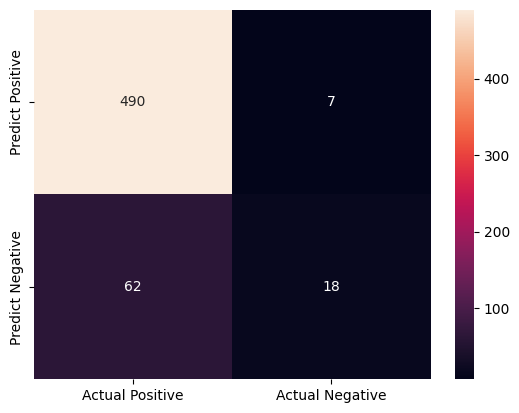

In [352]:
from sklearn.metrics import confusion_matrix
lg_cm = confusion_matrix(y_test, lg_pred_test)
print('Confusion matrix\n\n', lg_cm)
print('\nTrue Positives(TP) = ', lg_cm[0,0])
print('\nTrue Negatives(TN) = ', lg_cm[1,1])
print('\nFalse Positives(FP) = ', lg_cm[0,1])
print('\nFalse Negatives(FN) = ', lg_cm[1,0])
cm_matrix = pd.DataFrame(data=lg_cm, columns=['Actual Positive', 'Actual Negative'], 
                                 index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d')

## Naive Bayes

In [353]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [354]:
nb_pred_train = nb.predict(X_train)
nb_pred_test = nb.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred_test)
nb_prec = precision_score(y_test, nb_pred_test)
nb_rec = recall_score(y_test, nb_pred_test)
nb_f1 = f1_score(y_test, nb_pred_test)
nb_auc = roc_auc_score(y_test, nb_pred_test)
print("Naive Bayes Accuracy: %.4f" % nb_acc)
print("Naive Bayes Precision: %.4f" % nb_prec)
print("Naive Bayes Recall: %.4f" % nb_rec)
print("Naive Bayes F1: %.4f" % nb_f1)
print("Naive Bayes AUC: %.4f" % nb_auc)

nb_prec_train = precision_score(y_train, nb_pred_train)
nb_prec_test = precision_score(y_test, nb_pred_test)
# Check for overfitting
print('Training set score: {:.4f}'.format(nb_prec_train))
print('Test set score: {:.4f}'.format(nb_prec_test))

Naive Bayes Accuracy: 0.7522
Naive Bayes Precision: 0.2797
Naive Bayes Recall: 0.5000
Naive Bayes F1: 0.3587
Naive Bayes AUC: 0.6464
Training set score: 0.3087
Test set score: 0.2797


In [355]:
scores = cross_val_score(nb, X_train, y_train, cv = 5, scoring='precision')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {:.4f}'.format(scores.mean())) 

Cross-validation scores:[0.25352113 0.2987013  0.33333333 0.32467532 0.26666667]
Average cross-validation score: 0.2954


Confusion matrix

 [[394 103]
 [ 40  40]]

True Positives(TP) =  394

True Negatives(TN) =  40

False Positives(FP) =  103

False Negatives(FN) =  40


<Axes: >

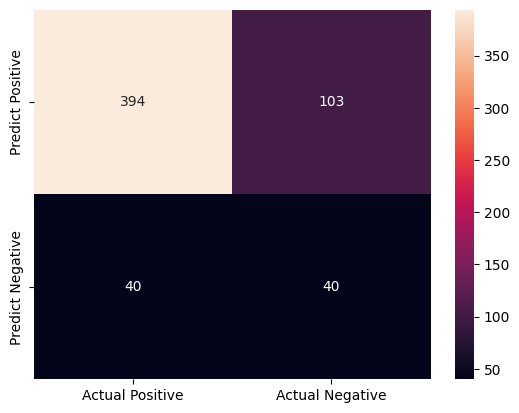

In [356]:
nb_cm = confusion_matrix(y_test, nb_pred_test)
print('Confusion matrix\n\n', nb_cm)
print('\nTrue Positives(TP) = ', nb_cm[0,0])
print('\nTrue Negatives(TN) = ', nb_cm[1,1])
print('\nFalse Positives(FP) = ', nb_cm[0,1])
print('\nFalse Negatives(FN) = ', nb_cm[1,0])
cm_matrix = pd.DataFrame(data=nb_cm, columns=['Actual Positive', 'Actual Negative'], 
                                 index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d')

## Decision Trees

In [357]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

## HyperParameter Optimization

In [358]:
# Define the parameter grid to search
parameters = {
    'criterion': ['gini', 'entropy'],  # Splitting criterion
    'max_depth': [None, 3, 5, 7],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}
grid_search = GridSearchCV(estimator = dt,  
                           param_grid = parameters,
                           scoring = 'precision',
                           cv = 5,
                           verbose=0)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5, 7],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='precision')

In [359]:
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))
print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV best score : 0.8222


Parameters that give the best results : 

 {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 5}


Estimator that was chosen by the search : 

 DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=4,
                       min_samples_split=5)
GridSearch CV score on test set: 0.4000


In [360]:
dt = grid_search.best_estimator_
dt.fit(X_train,y_train)
dt_pred_train = dt.predict(X_train)
dt_pred_test = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred_test)
dt_prec = precision_score(y_test, dt_pred_test)
dt_rec = recall_score(y_test, dt_pred_test)
dt_f1 = f1_score(y_test, dt_pred_test)
dt_auc = roc_auc_score(y_test, dt_pred_test)
print("Decision Trees Accuracy: %.4f" % dt_acc)
print("Decision Trees Precision: %.4f" % dt_prec)
print("Decision Trees Recall: %.4f" % dt_rec)
print("Decision Trees F1: %.4f" % dt_f1)
print("Decision Trees AUC: %.4f" % dt_auc)

dt_prec_train = precision_score(y_train, dt_pred_train)
dt_prec_test = precision_score(y_test, dt_pred_test)
# Check for overfitting
print('Training set score: {:.4f}'.format(dt_prec_train))
print('Test set score: {:.4f}'.format(dt_prec_test))

Decision Trees Accuracy: 0.8579
Decision Trees Precision: 0.4000
Decision Trees Recall: 0.0500
Decision Trees F1: 0.0889
Decision Trees AUC: 0.5190
Training set score: 0.9565
Test set score: 0.4000


Confusion matrix

 [[491   6]
 [ 76   4]]

True Positives(TP) =  491

True Negatives(TN) =  4

False Positives(FP) =  6

False Negatives(FN) =  76


<Axes: >

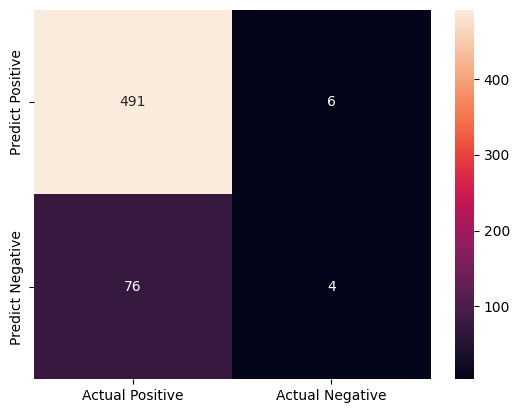

In [361]:
dt_cm = confusion_matrix(y_test, dt_pred_test)
print('Confusion matrix\n\n', dt_cm)
print('\nTrue Positives(TP) = ', dt_cm[0,0])
print('\nTrue Negatives(TN) = ', dt_cm[1,1])
print('\nFalse Positives(FP) = ', dt_cm[0,1])
print('\nFalse Negatives(FN) = ', dt_cm[1,0])
cm_matrix = pd.DataFrame(data=dt_cm, columns=['Actual Positive', 'Actual Negative'], 
                                 index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d')

## K-Nearest Neighbors

In [362]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

## HyperParameter Optimization

In [363]:
def compute_optimal_n_neighbors(X, y, n_neighbors_range, cv=5, scoring='precision'):
    mean_scores = []
    for n_neighbors in n_neighbors_range:
        knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        scores = cross_val_score(knn, X, y, cv=cv, scoring=scoring)
        mean_scores.append(np.mean(scores))
    optimal_n_neighbors = n_neighbors_range[np.argmax(mean_scores)]
    return optimal_n_neighbors, mean_scores
optimal_n_neighbors, mean_scores = compute_optimal_n_neighbors(X_train_scaled, y_train, n_neighbors_range=[3, 5, 7, 9, 11])
print("Optimal number of neighbors:", optimal_n_neighbors)
print("Mean cross-validation scores:", mean_scores)

Optimal number of neighbors: 11
Mean cross-validation scores: [0.4834074074074074, 0.4547602330056691, 0.5217604617604616, 0.5255494505494506, 0.595093795093795]


In [364]:
# Define the parameter grid to search
parameters = {
    'n_neighbors': [optimal_n_neighbors],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan']  # Distance metric used for the tree
}
grid_search = GridSearchCV(estimator = knn,  
                           param_grid = parameters,
                           scoring = 'precision',
                           cv = 5,
                           verbose=0)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [11],
                         'weights': ['uniform', 'distance']},
             scoring='precision')

In [365]:
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))
print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test_scaled, y_test)))

GridSearch CV best score : 0.6152


Parameters that give the best results : 

 {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}


Estimator that was chosen by the search : 

 KNeighborsClassifier(metric='manhattan', n_neighbors=11)
GridSearch CV score on test set: 0.5769


In [366]:
knn = grid_search.best_estimator_
knn.fit(X_train_scaled,y_train)
knn_pred_train = knn.predict(X_train_scaled)
knn_pred_test = knn.predict(X_test_scaled)
knn_acc = accuracy_score(y_test, knn_pred_test)
knn_prec = precision_score(y_test, knn_pred_test)
knn_rec = recall_score(y_test, knn_pred_test)
knn_f1 = f1_score(y_test, knn_pred_test)
knn_auc = roc_auc_score(y_test, knn_pred_test)
print("k-Nearest Neighbors Accuracy: %.4f" % knn_acc)
print("k-Nearest Neighbors Precision: %.4f" % knn_prec)
print("k-Nearest Neighbors Recall: %.4f" % knn_rec)
print("k-Nearest Neighbors F1: %.4f" % knn_f1)
print("k-Nearest Neighbors AUC: %.4f" % knn_auc)

knn_prec_train = precision_score(y_train, knn_pred_train)
knn_prec_test = precision_score(y_test, knn_pred_test)
# Check for overfitting
print('Training set score: {:.4f}'.format(knn_prec_train))
print('Test set score: {:.4f}'.format(knn_prec_test))

k-Nearest Neighbors Accuracy: 0.8683
k-Nearest Neighbors Precision: 0.5769
k-Nearest Neighbors Recall: 0.1875
k-Nearest Neighbors F1: 0.2830
k-Nearest Neighbors AUC: 0.5827
Training set score: 0.7391
Test set score: 0.5769


Confusion matrix

 [[486  11]
 [ 65  15]]

True Positives(TP) =  486

True Negatives(TN) =  15

False Positives(FP) =  11

False Negatives(FN) =  65


<Axes: >

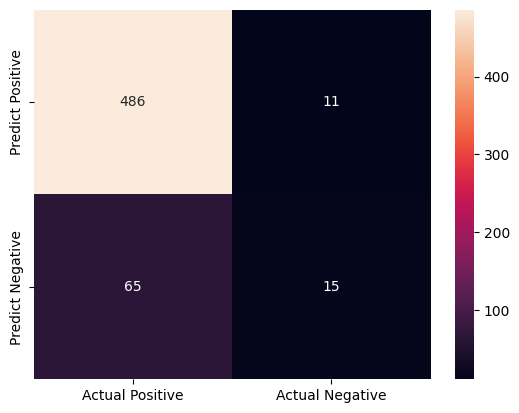

In [367]:
knn_cm = confusion_matrix(y_test, knn_pred_test)
print('Confusion matrix\n\n', knn_cm)
print('\nTrue Positives(TP) = ', knn_cm[0,0])
print('\nTrue Negatives(TN) = ', knn_cm[1,1])
print('\nFalse Positives(FP) = ', knn_cm[0,1])
print('\nFalse Negatives(FN) = ', knn_cm[1,0])
cm_matrix = pd.DataFrame(data=knn_cm, columns=['Actual Positive', 'Actual Negative'], 
                                 index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d')

## Support Vector Machines

In [368]:
from sklearn.svm import SVC
svm=SVC() 
svm.fit(X_train,y_train)

SVC()

## Hyperparameter Optimization

In [369]:
from sklearn.metrics import make_scorer
# param_grid = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
#                {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
#                {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
#               ]
# grid_search = GridSearchCV(estimator = svm,  
#                            param_grid = parameters,
#                            scoring = 'recall',
#                            cv = 5,
#                            verbose=0)
# grid_search.fit(X_train, y_train)



scorer = make_scorer(precision_score, average='binary', zero_division=0)
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf']}

# param_grid = {
#     'C': [0.1, 1, 10, 100], 
#     'gamma': [1, 0.1, 0.01, 0.001], 
#     'kernel': ['linear', 'rbf'] 
# }
grid_search = GridSearchCV(estimator=svm, scoring=scorer, param_grid=param_grid, cv=5)

grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             scoring=make_scorer(precision_score, response_method='predict', average=binary, zero_division=0))

In [370]:
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))
print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test_scaled, y_test)))

GridSearch CV best score : 0.8283


Parameters that give the best results : 

 {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}


Estimator that was chosen by the search : 

 SVC(C=1, gamma=0.01)
GridSearch CV score on test set: 0.6522


In [371]:
svm = grid_search.best_estimator_
svm.fit(X_train_scaled,y_train)
svm_pred_train = svm.predict(X_train_scaled)
svm_pred_test = svm.predict(X_test_scaled)
svm_acc = accuracy_score(y_test, svm_pred_test)
svm_prec = precision_score(y_test, svm_pred_test)
svm_rec = recall_score(y_test, svm_pred_test)
svm_f1 = f1_score(y_test, svm_pred_test)
svm_auc = roc_auc_score(y_test, svm_pred_test)
print("Support Vector Machines Accuracy: %.4f" % svm_acc)
print("Support Vector Machines Precision: %.4f" % svm_prec)
print("Support Vector Machines Recall: %.4f" % svm_rec)
print("Support Vector Machines F1: %.4f" % svm_f1)
print("Support Vector Machines AUC: %.4f" % svm_auc)

svm_prec_train = precision_score(y_train, svm_pred_train)
svm_prec_test = precision_score(y_test, svm_pred_test)
# Check for overfitting
print('Training set score: {:.4f}'.format(svm_prec_train))
print('Test set score: {:.4f}'.format(svm_prec_test))

Support Vector Machines Accuracy: 0.8735
Support Vector Machines Precision: 0.6522
Support Vector Machines Recall: 0.1875
Support Vector Machines F1: 0.2913
Support Vector Machines AUC: 0.5857
Training set score: 0.9322
Test set score: 0.6522


Confusion matrix

 [[489   8]
 [ 65  15]]

True Positives(TP) =  489

True Negatives(TN) =  15

False Positives(FP) =  8

False Negatives(FN) =  65


<Axes: >

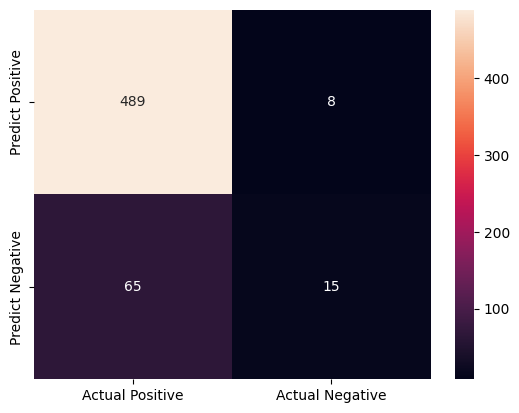

In [372]:
svm_cm = confusion_matrix(y_test, svm_pred_test)
print('Confusion matrix\n\n', svm_cm)
print('\nTrue Positives(TP) = ', svm_cm[0,0])
print('\nTrue Negatives(TN) = ', svm_cm[1,1])
print('\nFalse Positives(FP) = ', svm_cm[0,1])
print('\nFalse Negatives(FN) = ', svm_cm[1,0])
cm_matrix = pd.DataFrame(data=svm_cm, columns=['Actual Positive', 'Actual Negative'], 
                                 index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d')

## Summary of Results

In [373]:
from prettytable import PrettyTable
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC', 'Precision Training Score', 'Precision Test Score']

logistic_reg = [lg_acc, lg_prec, lg_rec, lg_f1, lg_auc, lg_prec_train, lg_prec_test]
logistic_reg = [f'{value:.4f}' if isinstance(value, float) else value for value in logistic_reg]

naive_bayes = [nb_acc, nb_prec, nb_rec, nb_f1, nb_auc, nb_prec_train, nb_prec_test]
naive_bayes = [f'{value:.4f}' if isinstance(value, float) else value for value in naive_bayes]

decision_tree = [dt_acc, dt_prec, dt_rec, dt_f1, dt_auc, dt_prec_train, dt_prec_test]
decision_tree = [f'{value:.4f}' if isinstance(value, float) else value for value in decision_tree]

k_nearest = [knn_acc, knn_prec, knn_rec, knn_f1, knn_auc, knn_prec_train, knn_prec_test] 
k_nearest = [f'{value:.4f}' if isinstance(value, float) else value for value in k_nearest]

support_vector = [svm_acc, svm_prec, svm_rec, svm_f1, svm_auc, svm_prec_train, svm_prec_test]
support_vector = [f'{value:.4f}' if isinstance(value, float) else value for value in support_vector]

# Create a list of tuples containing variable names and their values
variables = [
    ('Logistic Regression', logistic_reg),
    ('Naive Bayes', naive_bayes),
    ('Decision Tree', decision_tree),
    ('k-Nearest Neighbors', k_nearest),
    ('Support Vector Machines', support_vector)
]
table = PrettyTable()
# Display variables in a tabular format
table.add_column('Algorithm', labels)
table.add_column('Logistic Regression', logistic_reg)
table.add_column('Naive Bayes', naive_bayes)
table.add_column('Decision Tree', decision_tree)
table.add_column('k-Nearest Neighbors', k_nearest)
table.add_column('Support Vector Machines', support_vector)
table.align = 'l'
print(table)

+--------------------------+---------------------+-------------+---------------+---------------------+-------------------------+
| Algorithm                | Logistic Regression | Naive Bayes | Decision Tree | k-Nearest Neighbors | Support Vector Machines |
+--------------------------+---------------------+-------------+---------------+---------------------+-------------------------+
| Accuracy                 | 0.8804              | 0.7522      | 0.8579        | 0.8683              | 0.8735                  |
| Precision                | 0.7200              | 0.2797      | 0.4000        | 0.5769              | 0.6522                  |
| Recall                   | 0.2250              | 0.5000      | 0.0500        | 0.1875              | 0.1875                  |
| F1                       | 0.3429              | 0.3587      | 0.0889        | 0.2830              | 0.2913                  |
| AUC                      | 0.6055              | 0.6464      | 0.5190        | 0.5827          